# 앙상블: Bagging
- 다양한 모델을 결합하여 예측 성능을 향상시키는 방법
    - boostrap 방식의샘플링: 각 estimator 마다 훈련 데이터를 뽑을 때, 중복 값을 허용하는 방식
    - 분류 모델의 경우, 각 tree(estimator)의 예측값의 다수결(hard voting) 결정
    - 기본적으로 100개 tree 사용

**하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 "gini" 또는 "entropy"를 사용)                 | "gini"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 잎 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()"auto", "sqrt", "log2" 중 선택하거나, 특정 숫자 지정 가능) | "auto"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None            |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [5]:
# 데이터 준비
from sklearn.model_selection import train_test_split

x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=7,
    random_state=0
)

rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test))

0.9976525821596244 0.9790209790209791


In [ ]:
# 101개의 DescisionTree 확인
print(rf_clf.estimators_)

[DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=209652396), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=398764591), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=924231285), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1478610112), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=441365315), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1537364731), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=192771779), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1491434855), DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1819583497), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=530702035), DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=626610453), D

In [ ]:
# 101개의 DecisionTree가 사용한 샘플 확인
print(rf_clf.estimators_samples_)

[array([236, 227,  32,  64, 242, 310,  41, 423, 323, 239, 239, 201, 198,
         1,  49, 245, 263, 415, 111, 251, 169, 167, 418, 295,  57, 245,
       102,  31, 218,  76, 395, 213, 108, 103, 325, 304,  81, 156, 404,
         3, 272, 101, 203, 206,  80, 126, 282, 111,  32,  87, 224, 345,
       121, 310, 390,  38, 390, 148, 207, 190, 164, 370, 158,  60,  16,
       136,  97, 119,   0, 171, 265, 378, 257, 109, 367, 220, 220, 235,
       362, 361,  66, 220, 129, 373,  90, 303, 165, 312, 418,  88, 390,
       126, 351, 367, 417, 184, 102, 404, 353,  22,  45, 108, 407,  79,
       303, 361, 371, 114, 257, 286,   4,  93, 259, 324, 183, 276, 125,
        66,  56, 193, 365, 186, 349, 358, 224, 139, 134, 133, 270, 165,
       159, 278, 295, 317, 140, 144, 190, 403,  12, 109, 230, 237, 154,
       335, 239, 227, 216,  62,   5, 333, 273, 120,  24, 118, 423, 358,
       420,  57, 232, 406, 135, 289,  75,  65, 286,  59, 281, 376, 125,
       122, 232, 396, 170,  84, 174,  49, 315,  25, 404, 266,  

In [10]:
for i, sample_index in enumerate(rf_clf.estimators_samples_):
    print(f'{i}번째 결정트리의 샘플 인덱스: {sorted(sample_index)}')

0번째 결정트리의 샘플 인덱스: [np.int32(0), np.int32(0), np.int32(1), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(12), np.int32(12), np.int32(13), np.int32(16), np.int32(16), np.int32(16), np.int32(20), np.int32(22), np.int32(22), np.int32(24), np.int32(25), np.int32(25), np.int32(26), np.int32(31), np.int32(32), np.int32(32), np.int32(32), np.int32(35), np.int32(36), np.int32(36), np.int32(36), np.int32(38), np.int32(38), np.int32(40), np.int32(41), np.int32(41), np.int32(44), np.int32(45), np.int32(49), np.int32(49), np.int32(49), np.int32(53), np.int32(53), np.int32(55), np.int32(56), np.int32(56), np.int32(56), np.int32(57), np.int32(57), np.int32(57), np.int32(57), np.int32(59), np.int32(59), np.int32(60), np.int32(60), np.int32(62), np.int32(63), np.int32(63), np.int32(64), np.int32(65), np.int32(65), np.int32(66), np.int32(66), np.int32(66), np.int32(71), np.int32(72), np.int32(73), np.int32(75), np.int32(76), np.int32(77), np.int32(78

In [13]:
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
feat_imptc_ser

worst perimeter            0.162959
worst radius               0.116312
worst concave points       0.113276
mean concave points        0.109122
worst area                 0.061360
mean concavity             0.055477
mean perimeter             0.053938
mean area                  0.048122
worst concavity            0.037659
area error                 0.033015
radius error               0.029128
mean radius                0.024138
mean texture               0.015852
worst texture              0.014613
perimeter error            0.014427
worst smoothness           0.013655
worst compactness          0.012321
worst symmetry             0.012223
worst fractal dimension    0.009629
mean compactness           0.008857
mean smoothness            0.007069
texture error              0.006663
concave points error       0.006617
mean symmetry              0.006303
concavity error            0.006120
symmetry error             0.004555
fractal dimension error    0.004544
compactness error          0

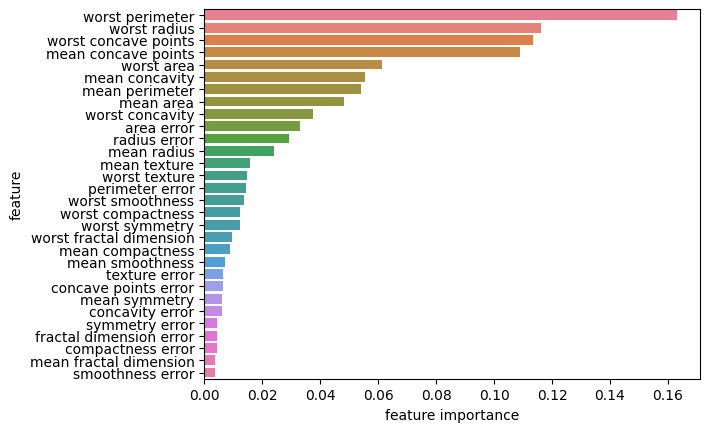

In [14]:
plt.Figure(figsize=(8, 6))
sns.barplot(
    x=feat_imptc_ser,
    y=feat_imptc_ser.index,
    hue=feat_imptc_ser.index
)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()